# Data processing

In this notebook, I am loading a list of molecules I obtained from ChEMBL and processing them to make sure I have:
- Standard SMILES representation of the compound
- InChIKey associated to the compound

In [42]:
import sys
repo_path = '/Users/adhivp/Desktop/Ersilia_tasks' #enter your repo path here
sys.path.append(repo_path)
import pandas as pd
import numpy as np
import os
from rdkit import Chem
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
reference_library_path = os.path.join(repo_path,'data/reference_library.csv')
reference_library = pd.read_csv(reference_library_path)
print(reference_library.head())

                                              smiles
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...


In [44]:
#refernce_libary given by mentors are alreday standarised incase not standarised use this code
'''from src.smiles_processing import standardise_smiles
reference_library['Standardised_smiles'] = reference_library['smiles'].apply(standardise_smiles)'''

"from src.smiles_processing import standardise_smiles\nreference_library['Standardised_smiles'] = reference_library['smiles'].apply(standardise_smiles)"

In [45]:
# use to create inchikeys
from src.convert_smiles import smiles_to_inchikey

reference_library['Inchikey'] = reference_library['smiles'].apply(smiles_to_inchikey)
print(reference_library.head())

                                              smiles  \
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1   
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1   
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl   
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...   
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...   

                      Inchikey  
0  SUTWUYBMBWPLMW-MDWZMJQESA-N  
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N  
2  OGNBARHGQVMGGX-UHFFFAOYSA-N  
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N  
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N  


In [46]:
# In this codeblock I will save the data as a .csv file containing only the standard smiles and the inchikey as columns. 
# All data will be saved with informative names in the /data folder
file_path = repo_path +'/data/data_processed.csv'
reference_library.to_csv(file_path,index=False)


# Model Bias Evaluation

Now, I will use the predictions I got from the Ersilia Model Hub on the dataset of 1000 molecules curated above and see how are they distributed in their space (which might be 0 to 1 for probabilities, or different for regression models)

In [47]:
eos30gr_output_path = os.path.join(repo_path,'data/eos30gr/eos30gr_output_data.csv')
eos30gr_output = pd.read_csv(eos30gr_output_path)
print(eos30gr_output.head())

                           key  \
0  SUTWUYBMBWPLMW-MDWZMJQESA-N   
1  RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2  OGNBARHGQVMGGX-UHFFFAOYSA-N   
3  WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4  YEGVLLQDOGYWDQ-OAHLLOKOSA-N   

                                               input  activity10  
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1    0.347112  
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1    0.547030  
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl    0.178218  
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...    0.620462  
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...    0.623267  


## Clean data , convert the data to 2 digit probabililty and removed null rows

In [48]:
eos30gr_output.dropna(inplace=True)
eos30gr_output['activity10'] = (eos30gr_output['activity10'] * 100).round(2).astype(int)
print(eos30gr_output)

                             key  \
0    SUTWUYBMBWPLMW-MDWZMJQESA-N   
1    RIYHJWOTNJXDLV-UHFFFAOYSA-N   
2    OGNBARHGQVMGGX-UHFFFAOYSA-N   
3    WQEXDIRUOYNDCM-UHFFFAOYSA-N   
4    YEGVLLQDOGYWDQ-OAHLLOKOSA-N   
..                           ...   
995  RGKVPYQYBUAAEH-UHFFFAOYSA-N   
996  VTRFEMUYHTXFEQ-UHFFFAOYSA-N   
997  QDFOYTHIYBSDPW-RGAOVNQFSA-N   
998  YZQZXLROYFNFQE-QTGUNEKASA-N   
999  PRGIOMDFWSHPTC-QPEQYQDCSA-N   

                                                 input  activity10  
0                         CCCCNC(=S)N/N=C/C1=C(C)C=CS1          34  
1           CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1          54  
2             O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl          17  
3    O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...          62  
4    CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...          62  
..                                                 ...         ...  
995  CCCN1C(C2=CN=C(NC3=CC=C(C)N=C3)C(Cl)=C2)=NC2=C...          75  
996   CN(CC1=CC

## Probability distribution

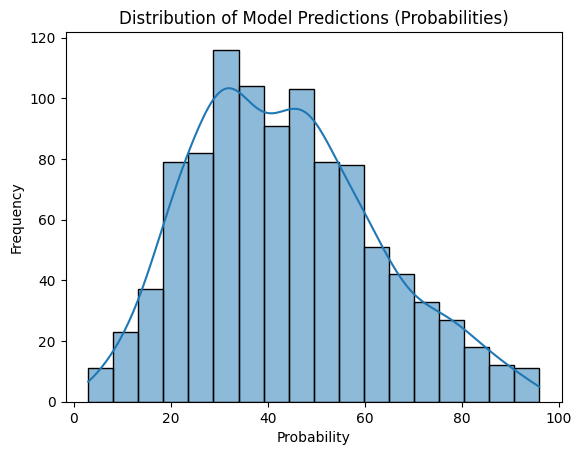

In [49]:
sns.histplot(data=eos30gr_output, x='activity10', kde=True)
plt.title('Distribution of Model Predictions (Probabilities)')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


## As per the research paper the probability above 80 is treated as a hREG blocker below 80 as a non blocker hREG here is a distribution of that below

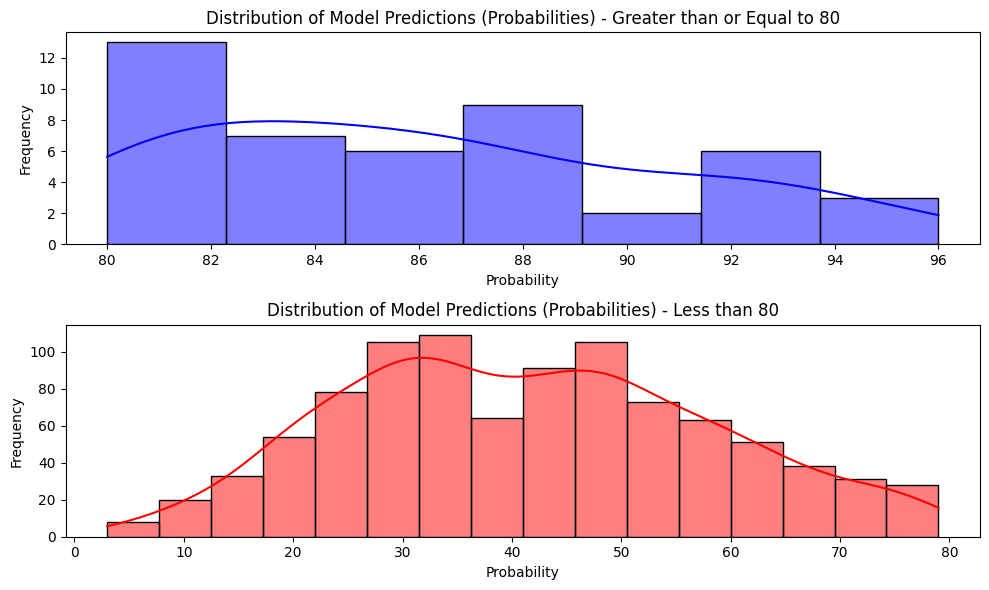

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

above_or_equal_80 = eos30gr_output[eos30gr_output['activity10'] >= 80]
below_80 = eos30gr_output[eos30gr_output['activity10'] < 80]


plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)  
sns.histplot(data=above_or_equal_80, x='activity10', kde=True, color='blue')
plt.title('Distribution of Model Predictions (Probabilities) - Greater than or Equal to 80')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)  
sns.histplot(data=below_80, x='activity10', kde=True, color='red')
plt.title('Distribution of Model Predictions (Probabilities) - Less than 80')
plt.xlabel('Probability')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Here is a comparison in difference of both

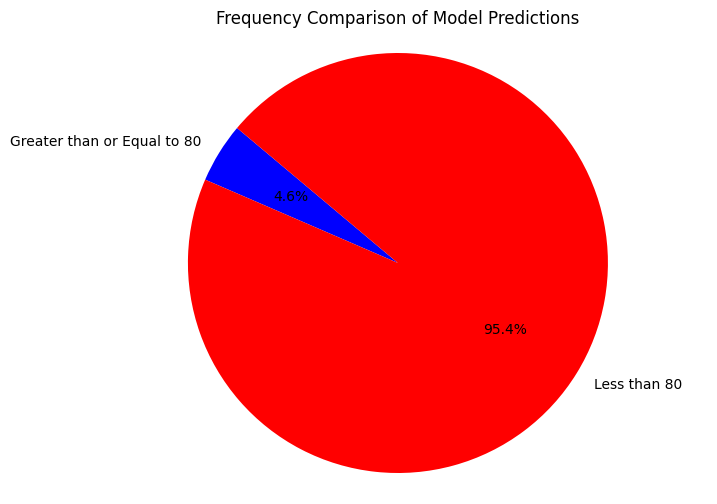

In [51]:
above_or_equal_80_count = len(eos30gr_output[eos30gr_output['activity10'] >= 80])
below_80_count = len(eos30gr_output[eos30gr_output['activity10'] < 80])

labels = ['Greater than or Equal to 80', 'Less than 80']
sizes = [above_or_equal_80_count, below_80_count]
colors = ['blue', 'red']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Frequency Comparison of Model Predictions')
plt.axis('equal')
plt.show()


## Conclusion
- The model has clearly shows a bais towards non-blockers and it's more likely to output it's a non-blocker 
- it's not a problem as the random sets contain more non-blockers and blockers may have a specific quality which only some molecules have in real world
